# implemented required liberaries.

In [1723]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
import os
import glob
from os import *
from os.path import *
import random
import shutil
%matplotlib inline

# tested whether our  model can use GPU provided by you or not.

In [1724]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPU  available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPU  available:  1


## getting my model which i saved as model_1.h5

In [1725]:
model_1=keras.models.load_model('model_1.h5')

# already splitted the given 153 images into about train(85%) and validation(15%) set  and here getting the paths.

In [1726]:
RANDOM_SEED = 1
IMG_SIZE = (224, 224)
IMG_PATH ="/home/anushks/storage/projection/fda_coversion/"

Training_Path = IMG_PATH + "train/"
Validation_Path = IMG_PATH + "validation/"

# did data augmentation on train and validation set.

In [1727]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,fill_mode='nearest',
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    shear_range=0.05,
    zoom_range=0.05,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

In [1728]:
train_generator = train_datagen.flow_from_directory(
    Training_Path,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=129*100000,
    class_mode='binary',
    seed=RANDOM_SEED
)

validation_generator = validation_datagen.flow_from_directory(
    Validation_Path,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=24*100000,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 129 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


# used  vgg16 model's layers exept last and added 3 layers at last from my side


# freezed all the layers of model exept last three layers which i added from my side.

In [1729]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_114 (Flatten)        (None, 25088)             0         
_________________________________________________________________
dropout_109 (Dropout)        (None, 25088)             0         
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


# now trained the model using train and validation set.

In [1730]:

history = model.fit_generator(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
)

/home/anushks/storage/miniconda3/envs/anushks/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 2.5263 - accuracy: 0.4419 - val_loss: 0.9435 - val_accuracy: 0.7500
Epoch 2/25
1/1 [==============================] - 2s 2s/step - loss: 1.9337 - accuracy: 0.6357 - val_loss: 0.3154 - val_accuracy: 0.9167
Epoch 3/25
1/1 [==============================] - 2s 2s/step - loss: 0.9078 - accuracy: 0.7829 - val_loss: 0.2549 - val_accuracy: 0.9583
Epoch 4/25
1/1 [==============================] - 2s 2s/step - loss: 0.5505 - accuracy: 0.8605 - val_loss: 0.2249 - val_accuracy: 0.9583
Epoch 5/25
1/1 [==============================] - 2s 2s/step - loss: 0.5042 - accuracy: 0.8915 - val_loss: 0.1325 - val_accuracy: 0.9583
Epoch 6/25
1/1 [==============================] - 2s 2s/step - loss: 0.1946 - accuracy: 0.9380 - val_loss: 0.0434 - val_accuracy: 0.9583
Epoch 7/25
1/1 [==============================] - 2s 2s/step - loss: 0.2303 - accuracy: 0.9380 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 8/25
1/1 [=========================

# plotted a graph to monitor the model (for QC process)accuracy.(its validation accuracy and accuracy)

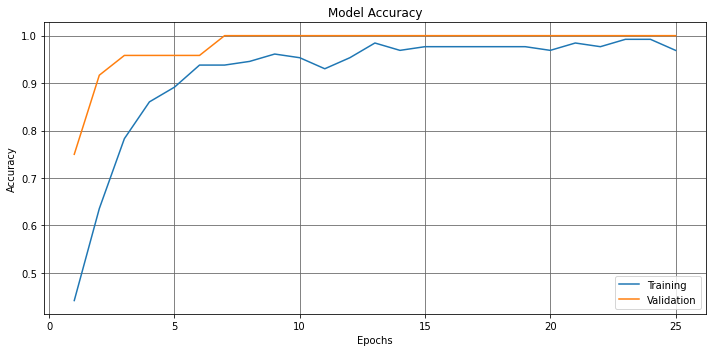

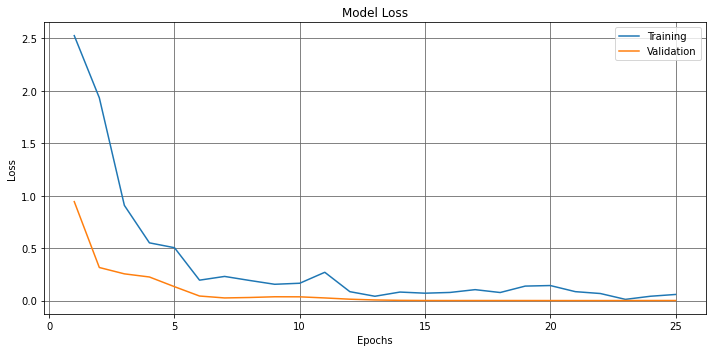

In [1731]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(history.epoch) + 1)


plt.figure(figsize=(10,5))

plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))

plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()
                                 

# arranging images from test folder into a list called test_data.

In [1760]:
test_data=[]
img_paths=[]
for img in glob.glob(IMG_PATH+"test/*.png"):
            img_paths.append(img)
            img = cv2.imread(img)
            img = cv2.resize(
                img,
                dsize=IMG_SIZE,
                interpolation=cv2.INTER_CUBIC
            )
            test_data.append(tf.keras.applications.vgg16.preprocess_input(img))


# model predicting on test_data. 1=good image,0=bad image

In [1761]:
predictions = model_1.predict(np.array(test_data))
print(predictions)
predictions =[0 if x < 0.5 else 1 for x in predictions]

[[1.        ]
 [1.        ]
 [1.        ]
 [0.00211865]
 [0.99999917]
 [0.99976224]
 [0.9999982 ]
 [0.9999994 ]
 [0.99999905]
 [0.99999976]]


# creating data frame containing paths to the images and labels to them.

In [1762]:
    data_frame = []
    for i  in range(len(img_paths)):
            label = 1 if predictions[i]==1 else 0
            data_frame.append({"path": img_paths[i], 'label': label})
            
    df = pd.DataFrame(data=data_frame).sample(frac=1).reset_index(drop=True)

# plotting the images with labels predicted by the model.

/tmp/ipykernel_28692/2020283376.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(len(img_paths)//5), 5, i+1)


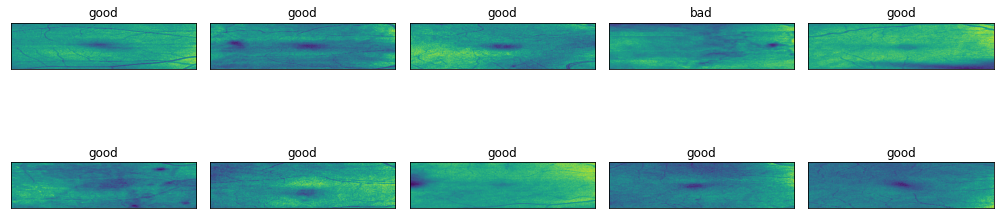

In [1763]:
    fig = plt.figure(figsize=(14,5), dpi=72)
    for i, row in df.iterrows():
        img=mpimg.imread(img_paths[i])
        plt.subplot(np.ceil(len(img_paths)//5), 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        subtitle = 'bad' if predictions[i] == 0 else 'good'
        plt.title(subtitle)
        plt.imshow(img)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None)
    plt.show()


In [1710]:
real_predictions=[1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,1,1,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,1,0,0]

# calculating accuracy.

In [1711]:
accuracy = accuracy_score(real_predictions, predictions)
print(accuracy)

0.5


# confusion matrix with true positive,true negative,false positive,false negative.

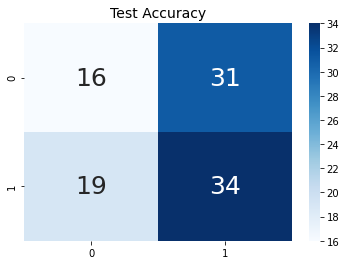

In [1712]:
confusion_mtx = confusion_matrix(real_predictions, predictions)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,annot_kws={"size": 25}, cmap="Blues", ax = ax)
ax.set_title('Test Accuracy', size=14)
plt.show()

In [1714]:
new_data_path="/home/anushks/storage/projection/new_data/fda_coversion/"

In [1715]:
def count_good_images(new_data_path,direction,threshold_value):
    
        count=0
        for instance in os.listdir(new_data_path+direction):
            for img in glob.glob(new_data_path+direction+"/"+instance+"/"+"*.png"):
                test_data=[]
                img = cv2.imread(img)
                img = cv2.resize(
                  img,
                  dsize=IMG_SIZE,
                  interpolation=cv2.INTER_CUBIC
              )
                test_data.append(tf.keras.applications.vgg16.preprocess_input(img))
                predictions=model_1.predict(np.array(test_data))
                predictions =[0 if x < threshold_value else 1 for x in predictions]
                if predictions[0]==1:
                    count=count+1
           
        return count


In [1696]:
thresholds=[]
good_images=[]
for threshold_value in np.arange(0.50,0.91,0.05):
    good_left_images=count_good_images(new_data_path,"left",threshold_value)
    good_right_images=count_good_images(new_data_path,"right",threshold_value)
    thresholds.append(threshold_value)
    good_images.append(good_left_images+good_right_images)   
    print(str(threshold_value)+"-"+str(good_left_images+good_right_images))
    
thresholds.append(0.99)
good_left_images=count_good_images(new_data_path,"left",0.99)
good_right_images=count_good_images(new_data_path,"right",0.99)
good_images.append(good_left_images+good_right_images)   
print(str(0.99)+"-"+str(good_left_images+good_right_images))

0.5-30450
0.55-30318
0.6000000000000001-30202
0.6500000000000001-30076
0.7000000000000002-29936
0.7500000000000002-29795
0.8000000000000003-29599
0.8500000000000003-29402
0.9000000000000004-29096
0.99-27300


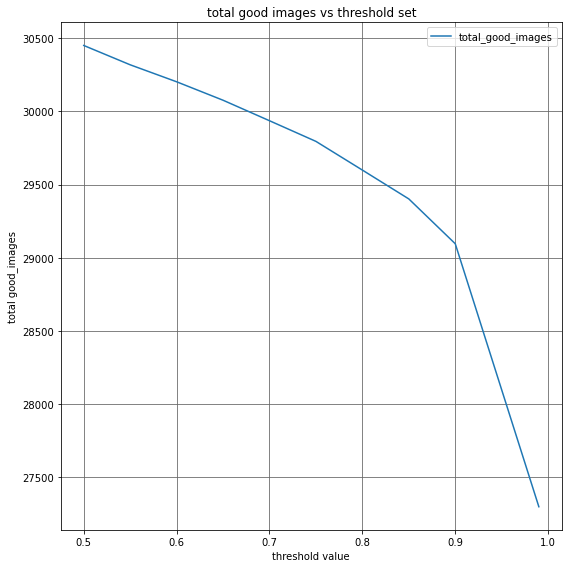

In [1718]:
plt.figure(figsize=(8,8))
plt.plot(thresholds,good_images, label='total_good_images')
plt.legend(loc="best")
plt.xlabel('threshold value')
plt.ylabel('total good_images')
plt.title('total good images vs threshold set')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.tight_layout()
plt.show()